# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Gybran Khairul Anam]
- **Email:** [gybrankhairulanam4@gmail.com]
- **ID Dicoding:** [gybranam]

## Menentukan Pertanyaan Bisnis

- Kota apa yang menghasilkan revenue terbesar?
- Kategori produk apa dengan pesanan tertinggi dan terendah?

## Import Semua Packages/Library yang Digunakan

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [97]:
customers = pd.read_csv("E-commerce-public-dataset\E-Commerce Public Dataset\customers_dataset.csv")
customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [98]:
geolocation = pd.read_csv("E-commerce-public-dataset\E-Commerce Public Dataset\geolocation_dataset.csv")
geolocation.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [99]:
orderitems = pd.read_csv("E-commerce-public-dataset/E-Commerce Public Dataset/order_items_dataset.csv")
orderitems.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [100]:
orderpayment= pd.read_csv("E-commerce-public-dataset\E-Commerce Public Dataset\order_payments_dataset.csv")
orderpayment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [101]:
orderreview = pd.read_csv("E-commerce-public-dataset\E-Commerce Public Dataset\order_reviews_dataset.csv")
orderreview.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [102]:
orderdataset= pd.read_csv("E-commerce-public-dataset\E-Commerce Public Dataset\orders_dataset.csv")
orderdataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [103]:
productcategory= pd.read_csv("E-commerce-public-dataset\E-Commerce Public Dataset\product_category_name_translation.csv")
productcategory.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [104]:
productdataset = pd.read_csv("E-commerce-public-dataset\E-Commerce Public Dataset\products_dataset.csv")
productdataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [105]:
sellers = pd.read_csv("E-commerce-public-dataset\E-Commerce Public Dataset\sellers_dataset.csv")
sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

1. Customer Dataset

In [106]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [107]:
customers.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

In [108]:
print("Jumlah duplikasi: ",  customers.duplicated().sum())

Jumlah duplikasi:  0


In [109]:
customers.nunique(axis=0)

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

In [110]:
customers.customer_city.unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

2. Geolocation Dataset

In [111]:
geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [112]:
geolocation.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

In [113]:
geolocation.nunique(axis=0)

geolocation_zip_code_prefix     19015
geolocation_lat                717360
geolocation_lng                717613
geolocation_city                 8011
geolocation_state                  27
dtype: int64

3. Order Items Dataset

In [114]:
orderitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [115]:
orderitems.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

In [116]:
print("Jumlah Duplikasi:", orderitems.duplicated().sum())

Jumlah Duplikasi: 0


In [117]:
orderitems.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


In [118]:
orderitems.duplicated('order_id').sum()

13984

In [119]:
orderitems.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

4. Order Payments Dataset

In [120]:
orderpayment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [121]:
orderpayment.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [122]:
orderpayment.duplicated('order_id').sum()

4446

In [123]:
orderpayment.nunique(axis=0)

order_id                99440
payment_sequential         29
payment_type                5
payment_installments       24
payment_value           29077
dtype: int64

5. Order Review Dataset

In [124]:
orderreview.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [125]:
orderreview.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [126]:
orderreview.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [127]:
print(f'review_id duplikat:', orderreview.duplicated('review_id').sum())
print(f'order_id duplikat:', orderreview.duplicated('order_id').sum())

review_id duplikat: 814
order_id duplikat: 551


6. Orders Dataset

In [128]:
orderdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [129]:
orderdataset.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

7. Product Category Names Translation Dataset

In [130]:
productcategory.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


8. Product Dataset

In [131]:
productdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [132]:
productdataset.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [133]:
productdataset.nunique()

product_id                    32951
product_category_name            73
product_name_lenght              66
product_description_lenght     2960
product_photos_qty               19
product_weight_g               2204
product_length_cm                99
product_height_cm               102
product_width_cm                 95
dtype: int64

In [134]:
productdataset.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


9. Sellers Dataset

In [135]:
sellers.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

### Cleaning Data
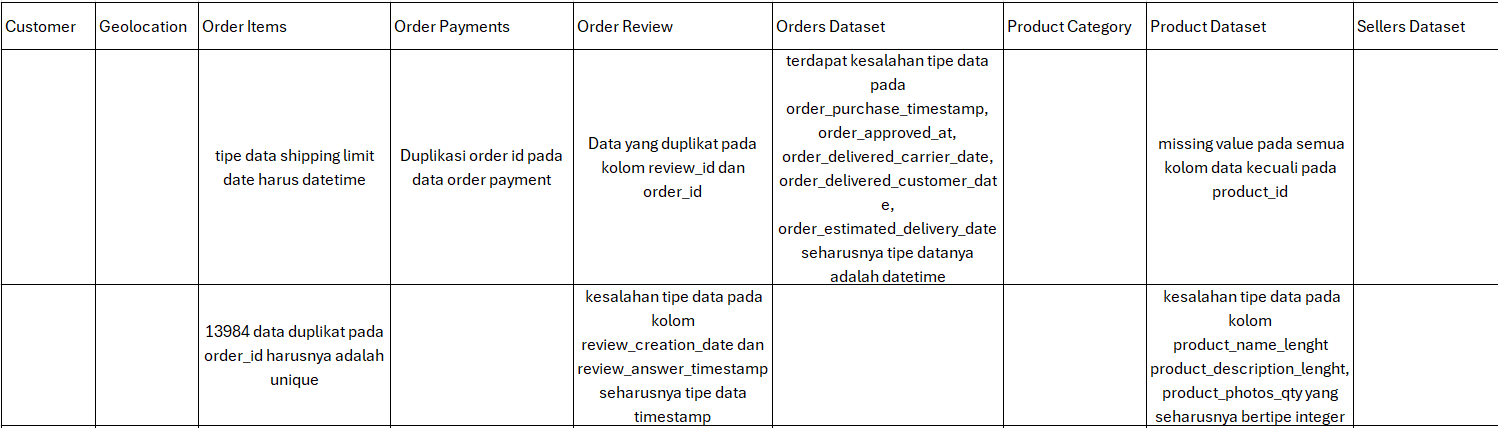

1. Order Items

In [136]:
orderitems['shipping_limit_date'] = orderitems['shipping_limit_date'].astype('datetime64[ns]') ## mengubah tipe data shipping_limit_date

In [137]:
orderitems.drop_duplicates(subset='order_id', inplace=True)
print(f'jumlah order_id duplikat:',orderitems.duplicated('order_id').sum()) ## menghapus semua data duplikat pada kolom order_id

jumlah order_id duplikat: 0


In [138]:
orderitems.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98666 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   order_id             98666 non-null  object        
 1   order_item_id        98666 non-null  int64         
 2   product_id           98666 non-null  object        
 3   seller_id            98666 non-null  object        
 4   shipping_limit_date  98666 non-null  datetime64[ns]
 5   price                98666 non-null  float64       
 6   freight_value        98666 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


2. Order Review

In [139]:
orderreview.drop_duplicates(subset='review_id', inplace=True)
print(f'jumlah review_id duplikat:',orderreview.duplicated('review_id').sum())

jumlah review_id duplikat: 0


In [140]:
orderreview.duplicated().sum()

0

In [141]:
orderreview.nunique()

review_id                  98410
order_id                   98167
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [142]:
# Definisikan kolom yang berisi tanggal
datetime_col = ['review_creation_date', 'review_answer_timestamp']

# Konversi tipe data kolom menjadi datetime
for column in datetime_col:
    orderreview[column] = pd.to_datetime(orderreview[column])

In [143]:
orderreview.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98410 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                98410 non-null  object        
 1   order_id                 98410 non-null  object        
 2   review_score             98410 non-null  int64         
 3   review_comment_title     11519 non-null  object        
 4   review_comment_message   40668 non-null  object        
 5   review_creation_date     98410 non-null  datetime64[ns]
 6   review_answer_timestamp  98410 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 6.0+ MB


3. Orders Dataset

In [144]:
# Definisikan kolom yang berisi tanggal
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

# Konversi tipe data kolom menjadi datetime
for column in datetime_columns:
    orderdataset[column] = pd.to_datetime(orderdataset[column])

In [145]:
orderdataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


4. Product Dataset

In [146]:
productdataset.rename(columns={'product_name_lenght': 'product_name_length', 'product_description_lenght': 'product_description_length'}, inplace=True)
##Mengganti nama kolom dalam dataset productdataset

In [147]:
# Mengisi nilai yang hilang dengan rata-rata dari kolom tersebut
columns_to_fill = ['product_name_length', 'product_description_length', 'product_photos_qty',
                   'product_weight_g', 'product_length_cm', 'product_height_cm', 'product_width_cm']

# Filling missing values with column means
productdataset[columns_to_fill] = productdataset[columns_to_fill].fillna(productdataset[columns_to_fill].mean())

# Displaying the resulting DataFrame
productdataset

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


In [148]:
productdataset.isna().sum()

product_id                      0
product_category_name         610
product_name_length             0
product_description_length      0
product_photos_qty              0
product_weight_g                0
product_length_cm               0
product_height_cm               0
product_width_cm                0
dtype: int64

In [149]:
productdataset['product_category_name'].interpolate(method='pad', axis=0, limit_direction='forward', inplace=True)

C:\Users\GYBRAN KHAIRUL ANAM\AppData\Local\Temp\ipykernel_1608\1897437584.py:1: FutureWarning: Series.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  productdataset['product_category_name'].interpolate(method='pad', axis=0, limit_direction='forward', inplace=True)


In [150]:
productdataset.isna().sum()

product_id                    0
product_category_name         0
product_name_length           0
product_description_length    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

**Menggabungkan Data**


productdataset & productcategory

In [151]:
product2 = pd.merge(
    left=productdataset,
    right=productcategory,
    how='outer',
    left_on='product_category_name',
    right_on='product_category_name'
)
product2

,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,39.0,346.0,2.0,400.0,27.0,5.0,20.0,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,52.0,150.0,1.0,422.0,21.0,16.0,18.0,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,49.0,460.0,2.0,267.0,17.0,13.0,17.0,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,56.0,733.0,3.0,377.0,18.0,13.0,15.0,perfumery
...,...,...,...,...,...,...,...,...,...,...
32946,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,44.0,348.0,1.0,18250.0,25.0,25.0,25.0,furniture_mattress_and_upholstery
32947,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,29.0,2073.0,2.0,2500.0,41.0,21.0,21.0,furniture_mattress_and_upholstery
32948,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,51.0,418.0,1.0,30000.0,60.0,73.0,60.0,furniture_mattress_and_upholstery
32949,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,41.0,866.0,1.0,1700.0,70.0,10.0,100.0,furniture_mattress_and_upholstery


orderitems & orderpayment

In [152]:
orders2 = pd.merge(
    left=orderitems,
    right=orderpayment,
    how='outer',
    left_on='order_id',
    right_on='order_id'
)
orders2.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1.0,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1.0,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,216.87
3,00024acbcdf0a6daa1e931b038114c75,1.0,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,1.0,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,218.04


order2 & product2

In [153]:
group = pd.merge(
    left=orders2,
    right=product2,
    how='outer',
    left_on='product_id',
    right_on='product_id'
)
group.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,1.0,credit_card,2.0,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,130898c0987d1801452a8ed92a670612,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,1.0,boleto,1.0,73.86,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,1.0,credit_card,2.0,83.23,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,1.0,credit_card,3.0,75.07,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1.0,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,1.0,credit_card,4.0,72.19,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff


In [154]:
group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104957 entries, 0 to 104956
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103887 non-null  object        
 1   order_item_id                  103057 non-null  float64       
 2   product_id                     104127 non-null  object        
 3   seller_id                      103057 non-null  object        
 4   shipping_limit_date            103057 non-null  datetime64[ns]
 5   price                          103057 non-null  float64       
 6   freight_value                  103057 non-null  float64       
 7   payment_sequential             103886 non-null  float64       
 8   payment_type                   103886 non-null  object        
 9   payment_installments           103886 non-null  float64       
 10  payment_value                  103886 non-null  float64       
 11  

orderdatase & customers

In [155]:
orderscustomer = pd.merge(
    left=orderdataset,
    right=customers,
    how='outer',
    left_on='customer_id',
    right_on='customer_id'
)
orderscustomer.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP


In [156]:
order_items_products_df = pd.merge(
    left=orderitems,
    right=product2,
    how="left",
    left_on="product_id",
    right_on="product_id"
)
order_items_products_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,42.0,480.0,1.0,200.0,16.0,10.0,15.0,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,59.0,409.0,1.0,3750.0,35.0,40.0,30.0,garden_tools


In [157]:

order_items_products_df['order_item_value'] = order_items_products_df['price'] + order_items_products_df['freight_value']
order_items_products_df.sample(5)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,order_item_value
46464,78c9dae3539db375cbc0786555c5f570,1,e0cf79767c5b016251fe139915c59a26,da8622b14eb17ae2831f4ac5b9dab84a,2018-05-29 01:31:25,29.90,10.76,beleza_saude,55.0,388.0,1.0,250.0,16.0,5.0,15.0,health_beauty,40.66
31929,52cb9b4d5ee3ce7d1e2a8d9c2376fd44,1,19c91ef95d509ea33eda93495c4d3481,06a2c3af7b3aee5d69171b0e14f0ee87,2018-07-20 03:04:07,122.99,21.13,beleza_saude,50.0,1257.0,1.0,700.0,25.0,12.0,19.0,health_beauty,144.12
67781,b06373098fedad1545401c91bf3af711,1,0cf41187284d7f099adc8415a743ebbd,bbad7e518d7af88a0897397ffdca1979,2018-05-07 13:31:22,35.90,8.88,bebes,60.0,644.0,1.0,300.0,16.0,16.0,16.0,baby,44.78
73089,bdbe0f3ee1e78fdf85d1a60f200f411c,1,78efe838c04bbc568be034082200ac20,0241d4d5d36f10f80c644447315af0bd,2018-01-26 18:16:53,99.90,23.57,moveis_decoracao,57.0,272.0,1.0,2500.0,40.0,10.0,30.0,furniture_decor,123.47
8933,17528d72766893a90deabc12ffc91207,1,09258106f546b38b0f817fc3aadf650b,4a3ca9315b744ce9f8e9374361493884,2017-12-12 13:30:48,48.50,11.85,brinquedos,48.0,236.0,1.0,200.0,45.0,15.0,35.0,toys,60.35


In [158]:
grouped_value = order_items_products_df.groupby(by="product_category_name_english").agg({
    "order_id": "nunique",
    "price":  "sum",
    "freight_value":  "sum",
    "order_item_value": "sum"
})

grouped_value.sort_values("order_item_value", ascending=False).head(5)

,order_id,price,freight_value,order_item_value
product_category_name_english,,,,
health_beauty,8930,1209413.59,171090.62,1380504.21
watches_gifts,5668,1174541.18,96249.64,1270790.82
bed_bath_table,9425,911716.31,175813.99,1087530.30
sports_leisure,7760,921283.20,153265.06,1074548.26
computers_accessories,6681,781118.77,126615.34,907734.11


In [159]:
grouped_value.sort_values("order_item_value", ascending=True).head(5)

,order_id,price,freight_value,order_item_value
product_category_name_english,,,,
security_and_services,2,283.29,41.22,324.51
fashion_childrens_clothes,8,569.85,95.51,665.36
cds_dvds_musicals,12,640.00,192.77,832.77
home_comfort_2,22,657.07,313.29,970.36
flowers,29,962.94,426.90,1389.84


In [160]:
# Merging DataFrames
all_df = orderscustomer.merge(order_items_products_df, on='order_id', how='inner') \
                        .merge(orderreview, on='order_id', how='inner') \
                        .merge(sellers, on='seller_id', how='left') \
                        .merge(group, on='order_id', how='left')

all_df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_value,product_category_name_y,product_name_length_y,product_description_length_y,product_photos_qty_y,product_weight_g_y,product_length_cm_y,product_height_cm_y,product_width_cm_y,product_category_name_english_y
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.12,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.00,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.59,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,141.46,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,179.12,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102045,9c5dedf39a927c1b2549525ed64a053c,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,2017-03-09 09:54:05,2017-03-10 11:18:03,2017-03-17 15:08:01,2017-03-28,6359f309b166b0196dbf7ad2ac62bb5a,12209,...,85.08,beleza_saude,50.0,1517.0,1.0,1175.0,22.0,13.0,18.0,health_beauty
102046,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-06 13:10:37,2018-02-07 23:22:42,2018-02-28 17:37:56,2018-03-02,da62f9e57a76d978d02ab5362c509660,11722,...,195.00,bebes,52.0,828.0,4.0,4950.0,40.0,10.0,40.0,baby
102047,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-08-27 15:04:16,2017-08-28 20:52:26,2017-09-21 11:24:17,2017-09-27,737520a9aad80b3fbbdad19b66b37b30,45920,...,271.01,eletrodomesticos_2,51.0,500.0,2.0,13300.0,32.0,90.0,22.0,home_appliances_2
102048,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-08 21:36:21,2018-01-12 15:35:03,2018-01-25 23:32:54,2018-02-15,5097a5312c8b157bb7be58ae360ef43c,28685,...,441.16,informatica_acessorios,59.0,1893.0,1.0,6550.0,20.0,20.0,20.0,computers_accessories


grup1 & ordercustomer

## Exploratory Data Analysis (EDA)

### Explore ...

In [161]:
orderscustomer.dropna(axis=0, inplace=True)
orderscustomer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
 8   customer_unique_id             96461 non-null  object        
 9   customer_zip_code_prefix       96461 non-null  int64         
 10  customer_city                  96461 non-null  object        
 11  customer_state      

Explore group

In [162]:
group.groupby(by='product_category_name_english').agg({
    'product_id':'nunique'
}).sort_values(by='product_id', ascending=False)

,product_id
product_category_name_english,
bed_bath_table,3087
sports_leisure,2916
furniture_decor,2719
health_beauty,2490
housewares,2381
...,...
tablets_printing_image,9
home_comfort_2,5
fashion_childrens_clothes,5


explore all_df

In [163]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102050 entries, 0 to 102049
Data columns (total 56 columns):
 #   Column                           Non-Null Count   Dtype         
---  ------                           --------------   -----         
 0   order_id                         102050 non-null  object        
 1   customer_id                      102050 non-null  object        
 2   order_status                     102050 non-null  object        
 3   order_purchase_timestamp         102050 non-null  datetime64[ns]
 4   order_approved_at                102036 non-null  datetime64[ns]
 5   order_delivered_carrier_date     101013 non-null  datetime64[ns]
 6   order_delivered_customer_date    99862 non-null   datetime64[ns]
 7   order_estimated_delivery_date    102050 non-null  datetime64[ns]
 8   customer_unique_id               102050 non-null  object        
 9   customer_zip_code_prefix         102050 non-null  int64         
 10  customer_city                    102050 non-

RFM Analysis
  -  Recency
  - Frequency
  - Monetary Value

In [164]:
rfm_df = all_df.groupby(by="customer_unique_id", as_index=False).agg({
    "order_purchase_timestamp": "max",  #mengambil tanggal order terakhir untuk setiap pelanggan.
    "order_id": "nunique",  #menghitung jumlah order unik yang dilakukan oleh pelanggan.
    "order_item_value": "sum"  #menghitung total nilai dari semua pesanan pelanggan.
})
rfm_df.columns = ["customer_unique_id", "max_order_timestamp", "frequency", "monetary"]
#konversi kolom timestamp menjadi tanggal saja untuk perhitungan 'Recency'.
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
#menghitung tanggal terkini dalam dataset untuk referensi 'Recency'.
recent_date = all_df["order_purchase_timestamp"].dt.date.max()
#perhitungan 'Recency' untuk setiap pelanggan dengan menghitung selisih hari dari tanggal terkini.
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)
#menghapus kolom 'max_order_timestamp' karena sudah tidak diperlukan setelah 'Recency' dihitung.
rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.sample(5)







,customer_unique_id,frequency,monetary,recency
21208,3918b12d374fe9727d4da03a423f6b12,1,152.58,92
45038,79793075af50851bb3ad5c48f69a7fc6,1,32.69,414
6198,109971a30c3389386a20317f9404f0f8,1,22.77,272
84057,e2f069490a9858578ee0accb5331631b,1,61.61,103
34047,5b9fd51537337750cd28594c51d63769,1,161.27,97


In [165]:
rfm_df.sort_values("recency", ascending=True).head()

,customer_unique_id,frequency,monetary,recency
4645,0c6d7218d5f3fa14514fd29865269993,1,178.25,0
65162,afbcfd0b9c5233e7ccc73428526fbb52,1,99.45,0
13643,24ac2b4327e25baf39f2119e4228976a,1,93.75,0
67018,b4dcade04bc548b7e3b0243c801f8c26,1,106.95,0
91772,f80013faf776e37bcea7634d59c2181e,1,74.21,0


Berdasarkan RFM analysis ini, kita bisa mengatakan bahwa kelima pelanggan ini adalah pelanggan baru atau baru-baru ini memulai berinteraksi paling akhir (karena nilai recency yang rendah).

In [166]:
rfm_df.sort_values("frequency", ascending=False).head()

,customer_unique_id,frequency,monetary,recency
52211,8d50f5eadf50201ccdcedfb9e2ac8455,16,902.04,9
23131,3e43e6105506432c953e165fb2acf44c,8,666.55,183
74988,ca77025e7201e3b30c44b472ff346268,7,833.84,89
10209,1b6c7548a2a1f9037c1fd3ddfed95f33,7,782.20,196
37261,6469f99c1f9dfae7733b25662e7f1782,7,693.62,62



Pelanggan dengan customer_unique_id 8d50f5eadf50201ccdcedfb9e2ac8455 menunjukkan kombinasi yang sangat baik dari ketiga aspek RFM. sering berbelanja sebanyak 16 kali

In [167]:
rfm_df.sort_values("monetary", ascending=False).head()

,customer_unique_id,frequency,monetary,recency
51424,8af7ac63b2efbcbd88e5b11505e8098a,1,13281.71,496
72865,c4b224d2c784bae11ae98b6ae9f2454c,1,11111.40,457
70569,be74c431147c32ab2d7c7cef5e4a995f,1,10055.22,111
88121,edf81e1f3070b9dac83ec83dacdbb9bc,1,8389.52,498
32760,58483a1c055dfb600f57c5b867174542,1,8068.88,85


Pelanggan dengan customer_unique_id 8af7ac63b2efbcbd88e5b11505e8098a memberikan value monetary R$ 13281.7

## Visualization & Explanatory Analysis

### Pertanyaan 1: Kota apa yang menghasilkan revenue terbesar?

C:\Users\GYBRAN KHAIRUL ANAM\AppData\Local\Temp\ipykernel_1608\3372055637.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "payment_value", y = "customer_city", data = topcities, palette = 'plasma')


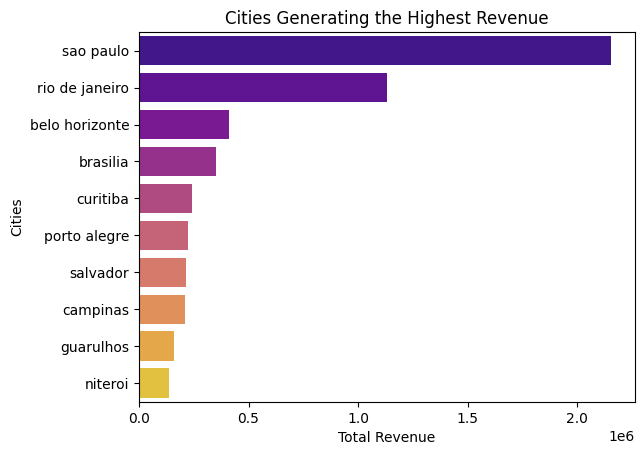

In [168]:
topcities = all_df.groupby("customer_city")["payment_value"].sum().reset_index().sort_values("payment_value", ascending = False).head(10)

sns.barplot(x = "payment_value", y = "customer_city", data = topcities, palette = 'plasma')
plt.xlabel("Total Revenue")
plt.ylabel("Cities")
plt.title("Cities Generating the Highest Revenue")
plt.show()

### Pertanyaan 2: Kategori produk apa dengan pesanan tertinggi dan terendah?

C:\Users\GYBRAN KHAIRUL ANAM\AppData\Local\Temp\ipykernel_1608\3311856021.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name_english_x", data=top_orders_product_cat, palette='gnuplot_r', ax=ax[0])
C:\Users\GYBRAN KHAIRUL ANAM\AppData\Local\Temp\ipykernel_1608\3311856021.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="order_id", y="product_category_name_english_x", data=low_orders_product_cat, palette='gnuplot', ax=ax[1])


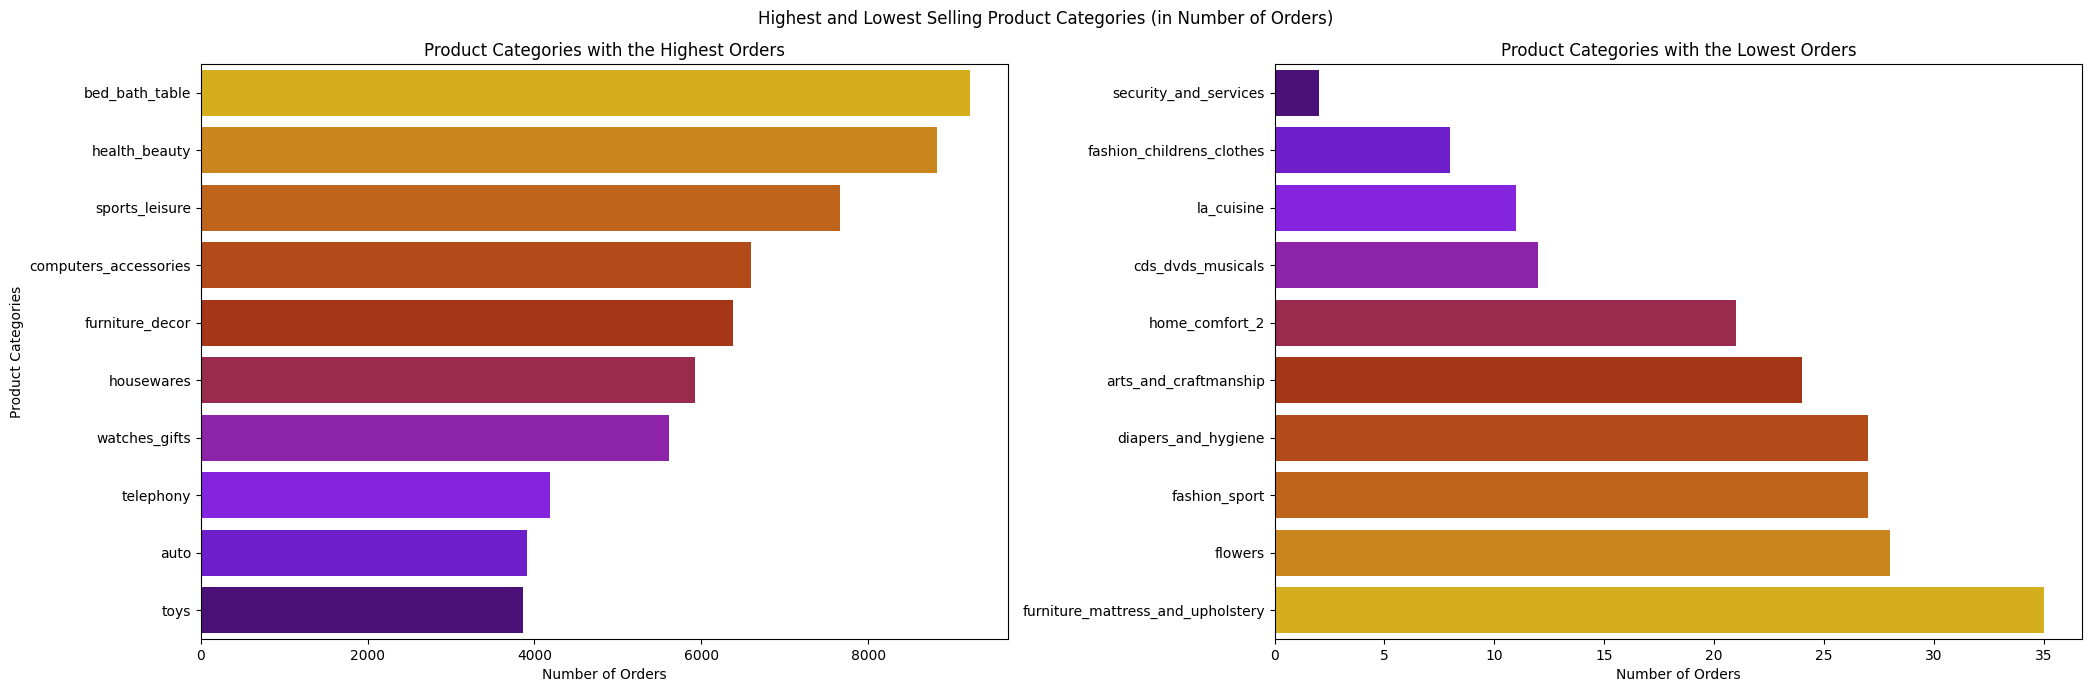

In [169]:
def plot_top_and_low_orders_product_cat(all_df):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(21, 7))

    top_orders_product_cat = all_df.groupby(all_df["product_category_name_english_x"])["order_id"].nunique().reset_index().sort_values("order_id", ascending=False).head(10)
    sns.barplot(x="order_id", y="product_category_name_english_x", data=top_orders_product_cat, palette='gnuplot_r', ax=ax[0])
    ax[0].set_xlabel("Number of Orders")
    ax[0].set_ylabel("Product Categories")
    ax[0].set_title("Product Categories with the Highest Orders")

    low_orders_product_cat = all_df.groupby(all_df["product_category_name_english_x"])["order_id"].nunique().reset_index().sort_values("order_id", ascending=True).head(10)
    sns.barplot(x="order_id", y="product_category_name_english_x", data=low_orders_product_cat, palette='gnuplot', ax=ax[1])
    ax[1].set_xlabel("Number of Orders")
    ax[1].set_ylabel("")
    ax[1].yaxis.set_label_position("right")
    ax[1].set_title("Product Categories with the Lowest Orders")

    plt.suptitle("Highest and Lowest Selling Product Categories (in Number of Orders)")
    plt.tight_layout(pad=1)
    plt.show()

plot_top_and_low_orders_product_cat(all_df)

In [170]:
# Menyimpan data all_df dalam file CSV
all_df.to_csv("main_data.csv", index=False)

## Conclusion

- Conclution pertanyaan 1
  - Sao paulo menghasilkan pendapatan tertinggi dibandingkan dengan kota kota-lainnya. Jumlah pendapatan yang dihasilkan jaauh melibihi kota lain, mendekati nilai 2 juta berdasarkan skala yang ditunjukkan.
  - Guarulhos dan Niteroi memiliki pendapatan paling sedikit di antara kota-kota yang terdaftar
- Conclution pertanyaan 2
  - Kategori 'bed_bath_table' memiliki jumlah pesanan tertinggi, yang menunjukkan bahwa ini mungkin kategori paling populer atau yang paling sering dibeli di situs tersebut.
  -'Security_and_servicees' memiliki jumlah pesanan yang sangat rendah, yang mungkin menunjukkan kurangnya minat atau kurangnya ketersediaan produk dalam kategori ini.